# Ficha técnica

__identificador__: aulaP7;

__título__: Processamento de datasets;

__data início__: 2021-11-22;

__autor__: José Carlos Ramalho, D1513;

__resumo__: Nesta aula, irás fazer exercícios sobre leitura de datasets, seu processamento e produção de dados estatísticos.

## Dataset

Para a resolução dos exercícios desta ficha, descarrega o dataset de alunos do site da UC.

### Estrutura do dataset
O dataset tem a seguinte estrutura:

```
id_aluno,nome,curso,tpc1,tpc2,tpc3,tpc4
"a1","Aysha Melanie Gilberto","LEI",12,8,19,8
"a2","Igor André Cantanhede","ENGFIS",12,16,18,20
"a3","Laurénio Narciso","ENGFIS",8,14,15,14
"a4","Jasnoor Casegas","LCC",14,20,17,11
"a5","Tawseef Rebouças","ENGBIOM",13,14,13,17
"a6","Eryk Clementino","LEI",10,19,11,14
...
```

## Leitura (exercício 1)

Depois de pensares num modelo adequado especifica a função que lê o ficheiro e povoa esse modelo.

In [37]:
# Descreve em texto o teu modelo
#BDAluno= [Aluno]
#Aluno= {id:"...",nome:"...",curso"...",tpc:[int]}

# Leitura/carregamento da informação do ficheiro

def getAluno(texto):
    textoLimpo=texto.replace("\"","")
    campos=textoLimpo.split(",")
    aluno=[]
    aluno.append(campos[0])
    aluno.append(campos[1])
    aluno.append(campos[2])
    aluno.append(campos[3:])
    lista=[]
    for s in aluno[3]:
        lista.append(int(s))
    aluno[3]=lista
    return aluno


def lerDataset(fnome):
    f=open(fnome, encoding="utf-8")
    bd=[]
    f.readline()
    for linha in f:
        bd.append(getAluno(linha))
    return bd

bd = lerDataset("alunos.csv")
print(bd)

[['a1', 'Aysha Melanie Gilberto', 'LEI', [12, 8, 19, 8]], ['a2', 'Igor André Cantanhede', 'ENGFIS', [12, 16, 18, 20]], ['a3', 'Laurénio Narciso', 'ENGFIS', [8, 14, 15, 14]], ['a4', 'Jasnoor Casegas', 'LCC', [14, 20, 17, 11]], ['a5', 'Tawseef Rebouças', 'ENGBIOM', [13, 14, 13, 17]], ['a6', 'Eryk Clementino', 'LEI', [10, 19, 11, 14]], ['a7', 'Ianna Noivo', 'ENGBIOM', [15, 15, 17, 16]], ['a8', 'Ayla Thaissa Reina', 'ENGBIOM', [12, 8, 8, 18]], ['a9', 'Cássia Viviane Coitã', 'ENGFIS', [19, 9, 14, 10]], ['a10', 'Koby Vindima', 'LEI', [9, 14, 20, 13]], ['a11', 'Gustavo Martim Hernandez', 'ENGBIOM', [11, 8, 14, 11]], ['a12', 'Siddarta Beiriz', 'LEI', [17, 10, 16, 16]], ['a13', 'Daniela Patrícia Montes', 'ENGBIOM', [15, 15, 18, 19]], ['a14', 'Kaylla Pessego', 'LCC', [10, 14, 17, 15]], ['a15', 'Bianca Cristina Primitivo', 'ENGBIOM', [16, 9, 18, 10]], ['a16', 'Magna Galhardo', 'ENGFIS', [20, 18, 9, 14]], ['a17', 'Grace Isabel Patriarca', 'LCC', [19, 13, 9, 10]], ['a18', 'Saubhagya Buco', 'LEI', [

## Listagem (exercício 2)

Especifica uma função que faça a listagem no monitor dos vários registos de informação.
Tenta dar a forma duma tabela em que as colunas têm todas a mesma dimensão.

In [20]:
# Listagem da informação
# id|nome|curso|média

def chaveOrd(a):
    return a[1]


def listarDataset(bd):
    bd.sort(key=chaveOrd)
    print("id        nome       curso     média")
    print("--------------------------------------------")
    for a in bd:
        print(a[0] + " | " + a[1] + " | " + a[2] + " | " + str(sum(a[3])/4))
       
listarDataset(bd)

id        nome       curso     média
--------------------------------------------
a53 | Abner Umbelina | ENGBIOM | 14.75
a69 | Adele Belchior | ENGBIOM | 15.25
a88 | Afonso Adriano Marca | ENGBIOM | 12.75
a62 | Ahmadou Bamba Calcinha | LCC | 14.25
a72 | Ana Gabriel Quirino | LCC | 13.5
a96 | Anaïs Sintra | LCC | 14.75
a32 | Ariane Sofia Foja | LEI | 17.5
a8 | Ayla Thaissa Reina | ENGBIOM | 11.5
a1 | Aysha Melanie Gilberto | LEI | 11.75
a15 | Bianca Cristina Primitivo | ENGBIOM | 13.25
a93 | Bivhan Reimbau | LCC | 12.0
a61 | Bradley Tabau | LCC | 15.75
a73 | Carolina Antoo | ENGBIOM | 16.25
a86 | Clésio Rodeiro | LCC | 13.0
a91 | Constança Filipa Melado | LEI | 12.5
a9 | Cássia Viviane Coitã | ENGFIS | 13.0
a13 | Daniela Patrícia Montes | ENGBIOM | 16.75
a71 | Derrick Urias | ENGFIS | 10.75
a25 | Dhriti Magano | ENGFIS | 14.25
a36 | Diana Beatriz Boavista | LCC | 16.5
a83 | Dolorinda Adolfo | ENGFIS | 13.75
a75 | Dárcio Wosvaldo Tudela | LEI | 13.25
a54 | Dânia Lucy Montelobo | LEI | 1

## Consulta de um registo (exercício 3)

Especifica uma função que, dado o id de um aluno, coloca a sua informação no monitor. Para além disso, indica também a média dos TPC realizados.

In [47]:
# Consulta de um registo

def media(m):
    soma = 0
    for i in range(0,len(m)):
        soma = soma + m[i]
    return soma/4


def consultarDataset(bd, id):
    for i in range(0,len(bd)):
        if bd[i][0] == id:
            med = media(bd[i][3])
            return("INFO :: " + str(bd[i][0:3]) + "\nMEDIA :: " + str(med))
        else:
            if i == len(bd)-1:
                return('Não existe nenhum aluno com esse id!')
            
print(consultarDataset(bd, "a25"))

INFO :: ['a25', 'Dhriti Magano', 'ENGFIS']
MEDIA :: 14.25


## Top 10 (exercício 4)

Especifica um função que dá como resultado uma lista com os alunos com as 10 médias mais altas: id, nome, curso, média.

In [50]:
def chaveOrdena(a):
    return media(a[3])

def top10(bd):                                   
    bd.sort(key = chaveOrdena, reverse = True) 
    novaBD = []                                         
    for aluno in range(0,10):                         
        novoAluno = []                             
        for parametro in range(0,3):                  
            novoAluno.append(bd[aluno][parametro])  
        novoAluno.append(media(bd[aluno][3]))         
        novaBD.append(novoAluno)
    return novaBD

print(top10(bd))

[['a47', 'Moisés João Cornelio', 'LEI', 18.0], ['a80', 'Maria Carolina Josué', 'ENGFIS', 18.0], ['a32', 'Ariane Sofia Foja', 'LEI', 17.5], ['a74', 'Vânia Sofia Porfirio', 'ENGBIOM', 17.5], ['a56', 'Hakeem Brazão', 'LEI', 17.25], ['a84', 'Laudário Frasão', 'LCC', 17.0], ['a13', 'Daniela Patrícia Montes', 'ENGBIOM', 16.75], ['a41', 'Lachezar Rosas', 'ENGBIOM', 16.75], ['a45', 'Imayame Hespanha', 'ENGFIS', 16.75], ['a2', 'Igor André Cantanhede', 'ENGFIS', 16.5]]


## Distribuição por curso (exercício 5)

Especifica uma função que dá como resultado uma lista de pares indicando quantos alunos há em cada curso.

In [51]:
def distribPorCurso(d):
    distribuicao={}
    for a in d:
        if a[2] in distribuicao.keys():
            distribuicao[a[2]]=distribuicao[a[2]]+1
        else:
            distribuicao[a[2]]=1
    return distribuicao

print(distribPorCurso(bd))

{'LEI': 23, 'ENGFIS': 32, 'ENGBIOM': 25, 'LCC': 20}


## Distribuição por médias (exercício 6)

Especifica uma função que dá como resultado uma lista de pares, média e número de alunos com essa média (considera o valor inteiro da média).

In [32]:
def distribPorMedia(d):
    distribuicao={}
    for a in d:
        if str(round(media(a[3]))) in distribuicao.keys():
            distribuicao[str(round(media(a[3])))]=distribuicao[str(round(media(a[3])))]+1
        else:
            distribuicao[str(round(media(a[3])))]=1
    return distribuicao

print(distribPorMedia(bd))

{'18': 4, '17': 5, '16': 13, '15': 15, '14': 25, '13': 18, '12': 13, '11': 5, '10': 2}


# Gráficos

## Gráfico da distribuição por curso (exercício 7)

Especifica uma função que faz o plot dum gráfico com a distribuição de alunos por curso.

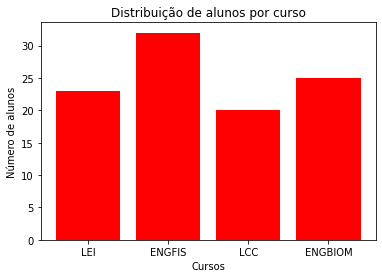

In [34]:
import matplotlib.pyplot as plt

def plotDistribPorCurso(bd):
    left = []
    height = []
    tick_label = []
 
    a=distribPorCurso(bd)
    i=1
    for elem in a:
        tick_label.append(elem)
        height.append(a[elem])
        left.append(i)
        i=i+1
    plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red'])
    
    plt.xlabel('Cursos')
    plt.ylabel('Número de alunos')
    plt.title("Distribuição de alunos por curso")
    plt.show()
plotDistribPorCurso(bd)


## Gráfico da distribuição por média (exercício 8)

Especifica uma função que faz o plot dum gráfico com a distribuição de alunos por média.

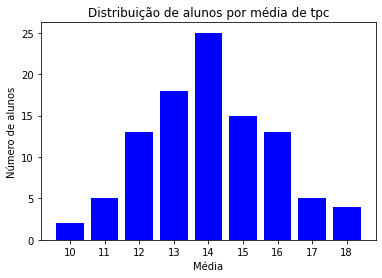

In [53]:
import matplotlib.pyplot as plt

def plotDistribPorMedia(bd):
    left = []
    height = []
    tick_label = []
 
    a=ordenarDicMedia(bd)
    i=1
    for elem in a:
        tick_label.append(elem)
        height.append(a[elem])
        left.append(i)
        i=i+1
    plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['blue'])
    
    plt.xlabel('Média')
    plt.ylabel('Número de alunos')
    plt.title("Distribuição de alunos por média de tpc")
    plt.show()

d=distribPorMedia(bd)
plotDistribPorMedia(d)